In [1]:
# Student name: HUANG Liang
# Student number: 22465693

In [2]:
# Import Dependencies
%matplotlib inline

# Data Manipulaiton
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data = pd.read_csv('co2-emissions-and-gdp.csv')
df = data.copy()
df.head(5)

,Entity,Code,Year,Annual CO2 emissions,Annual consumption-based CO2 emissions,"GDP, PPP (constant 2017 international $)"
0,Afghanistan,AFG,1990,2603238.0,NaN,NaN
1,Afghanistan,AFG,1991,2427366.0,NaN,NaN
2,Afghanistan,AFG,1992,1379462.0,NaN,NaN
3,Afghanistan,AFG,1993,1333055.0,NaN,NaN
4,Afghanistan,AFG,1994,1281602.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    7795 non-null   object 
 1   Code                                      6864 non-null   object 
 2   Year                                      7795 non-null   int64  
 3   Annual CO2 emissions                      7316 non-null   float64
 4   Annual consumption-based CO2 emissions    4065 non-null   float64
 5   GDP, PPP (constant 2017 international $)  6169 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 365.5+ KB


In [5]:
df.describe()

,Year,Annual CO2 emissions,Annual consumption-based CO2 emissions,"GDP, PPP (constant 2017 international $)"
count,7795.000000,7.316000e+03,4.065000e+03,6.169000e+03
mean,2005.056960,5.706661e+08,9.763262e+08,2.142035e+12
std,8.933225,2.599228e+09,3.366486e+09,8.887134e+12
min,1990.000000,3.664000e+03,1.972017e+05,2.326195e+07
25%,1997.000000,1.006212e+06,1.075953e+07,1.341735e+10
50%,2005.000000,8.355297e+06,5.997506e+07,6.012142e+10
75%,2013.000000,7.762361e+07,2.908549e+08,3.989026e+11
max,2020.000000,3.670250e+10,3.670250e+10,1.298284e+14


In [6]:
df.columns

Index(['Entity', 'Code', 'Year', 'Annual CO2 emissions',
       'Annual consumption-based CO2 emissions',
       'GDP, PPP (constant 2017 international $)'],
      dtype='object')

In [7]:
df=df.rename(columns={"Annual CO2 emissions":"CO2"})
df=df.rename(columns={"Annual consumption-based CO2 emissions":"Consumption-based CO2"})
df=df.rename(columns={"GDP, PPP (constant 2017 international $)":"GDP-PPP"})
df.head(2)

,Entity,Code,Year,CO2,Consumption-based CO2,GDP-PPP
0,Afghanistan,AFG,1990,2603238.0,NaN,NaN
1,Afghanistan,AFG,1991,2427366.0,NaN,NaN


In [8]:
# scrape the "World" data only
df_World=df[df["Entity"]=="World"]
# see the change of number of CO2 emission in World by year with line chart
fig = go.Figure(data=go.Scatter(x=df_World['Year'],
                                y=df_World['CO2'],
                                mode='lines')) # hover text goes here
fig.update_layout(title='Number Of CO2 Emission In World',title_x=0.5,xaxis_title="Year",yaxis_title="Number of CO2 Emission (tonnes)")
# show the line chart
fig.show()

In [9]:
# We can see the result of the change of number of CO2 emission in World by year with the above line chart
# and we can also see there is a significant decrease from 2019 to 2020.
# So I also want to explore the increase/ decrease of 6 continents
fig = go.Figure()

# scrape the different 6 continent data
df_Asia=df[df["Entity"]=="Asia"]
df_Africa=df[df["Entity"]=="Africa"]
df_Europe=df[df["Entity"]=="Europe"]
df_North_America=df[df["Entity"]=="North America"]
df_South_America=df[df["Entity"]=="South America"]
df_Oceania=df[df["Entity"]=="Oceania"]
df_Antarctica=df[df["Entity"]=="Antarctica"]

# make these data visualization
fig.add_trace(go.Scatter(x=df_Asia['Year'], y=df_Asia['CO2'], name = 'Asia',
                         line=dict(color='blue', width=4,dash="dot")))

fig.add_trace(go.Scatter(x=df_Africa['Year'], y=df_Africa['CO2'], name = 'Africa',
                         line=dict(color='forestgreen', width=4,dash="dot")))

fig.add_trace(go.Scatter(x=df_Europe['Year'], y=df_Europe['CO2'], name = 'Europe',
                         line=dict(color='red', width=4,dash="dot")))

fig.add_trace(go.Scatter(x=df_North_America['Year'], y=df_North_America['CO2'], name = 'North_America',
                         line=dict(color='brown', width=4,dash="dot")))

fig.add_trace(go.Scatter(x=df_South_America['Year'], y=df_South_America['CO2'], name = 'South_America',
                         line=dict(color='goldenrod', width=4,dash="dot")))

fig.add_trace(go.Scatter(x=df_Oceania['Year'], y=df_Oceania['CO2'], name = 'Oceania',
                         line=dict(color='orange', width=4,dash="dot")))

fig.add_trace(go.Scatter(x=df_Antarctica['Year'], y=df_Antarctica['CO2'], name = 'Antarctica',
                         line=dict(color='black', width=4,dash="dot")))


fig.update_layout(title='CO2 Emission Over Time For Seven Continents',title_x=0.5,xaxis_title="Years",yaxis_title="Number of CO2 Emission(tonnes)")

# show the line chart
fig.show()

# We can clearly see there are signicant CO2 emissions decrease from 2019 to 2020 in Asia, North America and Europe
# Asia has the most CO2 emissions from 1992 and it seems always increased from 1990 to 2020.
# As a conlusion, these 3 continents make a huge contribution to the world's CO2 emissions

In [10]:
# Remove the "World", 7 continents and different kinds of "Income counrties" data
df_new =  df.loc[df['Entity'] != 'World']
print("Is the 'World' varible still in subset?(True or False): {}".format('World' in df_new['Entity']))
df_new2 =  df_new.loc[df_new['Entity'] != 'Asia']
print("Is the 'Asia' varible still in subset?(True or False): {}".format('Asia' in df_new2['Entity']))
df_new3 =  df_new2.loc[df_new2['Entity'] != 'Africa']
print("Is the 'Africa' varible still in subset?(True or False): {}".format('Africa' in df_new3['Entity']))
df_new4 =  df_new3.loc[df_new3['Entity'] != 'Europe']
print("Is the 'Europe' varible still in subset?(True or False): {}".format('Europe' in df_new4['Entity']))
df_new5 =  df_new4.loc[df_new4['Entity'] != 'North America']
print("Is the 'North America' varible still in subset?(True or False): {}".format('North America' in df_new5['Entity']))
df_new6 =  df_new5.loc[df_new5['Entity'] != 'South America']
print("Is the 'South America' varible still in subset?(True or False): {}".format('South America' in df_new6['Entity']))
df_new7 =  df_new6.loc[df_new6['Entity'] != 'Oceania']
print("Is the 'Oceania' varible still in subset?(True or False): {}".format('Oceania' in df_new7['Entity']))
df_new8 =  df_new7.loc[df_new7['Entity'] != 'Antarctica']
print("Is the 'Antarctica' varible still in subset?(True or False): {}".format('Antarctica' in df_new8['Entity']))
df_new9 =  df_new8.loc[df_new8['Entity'] != 'Upper-middle-income countries']
print("Is the 'Upper-middle-income countries' varible still in subset?(True or False): {}".format('Upper-middle income countries' in df_new9['Entity']))
df_new10 =  df_new9.loc[df_new9['Entity'] != 'High-income countries']
print("Is the 'High-income countries' varible still in subset?(True or False): {}".format('High-income countries' in df_new10['Entity']))
df_new11 =  df_new10.loc[df_new10['Entity'] != 'Lower-middle-income countries']
print("Is the 'Lower-middle-income countries' varible still in subset?(True or False): {}".format('Lower-middle-income countries' in df_new11['Entity']))

Is the 'World' varible still in subset?(True or False): False
Is the 'Asia' varible still in subset?(True or False): False
Is the 'Africa' varible still in subset?(True or False): False
Is the 'Europe' varible still in subset?(True or False): False
Is the 'North America' varible still in subset?(True or False): False
Is the 'South America' varible still in subset?(True or False): False
Is the 'Oceania' varible still in subset?(True or False): False
Is the 'Antarctica' varible still in subset?(True or False): False
Is the 'Upper-middle-income countries' varible still in subset?(True or False): False
Is the 'High-income countries' varible still in subset?(True or False): False
Is the 'Lower-middle-income countries' varible still in subset?(True or False): False


In [11]:
# Create a new dataset we need and the condition we set up is "Year" >=2010
# To see the trend of CO2 emissions/ GDP-PPP/ Consumption-based CO2 from 2010 to 2020 
df_allnew = df_new11[(df_new['Year']>= 2010)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [12]:
df_allnew.head(11)

,Entity,Code,Year,CO2,Consumption-based CO2,GDP-PPP
20,Afghanistan,AFG,2010,8397779.0,NaN,5.711689e+10
21,Afghanistan,AFG,2011,12105788.0,NaN,5.736041e+10
22,Afghanistan,AFG,2012,10218514.0,NaN,6.467518e+10
23,Afghanistan,AFG,2013,8440766.0,NaN,6.829747e+10
24,Afghanistan,AFG,2014,7774340.0,NaN,7.015826e+10
25,Afghanistan,AFG,2015,7904133.0,NaN,7.117648e+10
26,Afghanistan,AFG,2016,6744628.0,NaN,7.278530e+10
27,Afghanistan,AFG,2017,6859825.0,NaN,7.471192e+10
28,Afghanistan,AFG,2018,8344829.0,NaN,7.560042e+10
29,Afghanistan,AFG,2019,12146674.0,NaN,7.855761e+10


In [13]:
df_allnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2672 entries, 20 to 7794
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 2672 non-null   object 
 1   Code                   2441 non-null   object 
 2   Year                   2672 non-null   int64  
 3   CO2                    2497 non-null   float64
 4   Consumption-based CO2  1260 non-null   float64
 5   GDP-PPP                2263 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 146.1+ KB


In [14]:
df_allnew.describe()

,Year,CO2,Consumption-based CO2,GDP-PPP
count,2672.000000,2.497000e+03,1.260000e+03,2.263000e+03
mean,2014.998129,2.421765e+08,4.264006e+08,2.189168e+12
std,3.161981,9.663802e+08,1.223118e+09,8.257368e+12
min,2010.000000,3.664000e+03,5.733969e+05,3.452468e+07
25%,2012.000000,1.261368e+06,1.405002e+07,2.032471e+10
50%,2015.000000,9.232425e+06,5.480893e+07,8.121890e+10
75%,2018.000000,6.573592e+07,2.291109e+08,4.701695e+11
max,2020.000000,1.066789e+10,9.442835e+09,6.833269e+13


In [15]:
# Combine the data through groupby function to make the Entity unique
df_allnew1=df_allnew.groupby("Entity").sum()
df_allnew1.reset_index(inplace=True)
list(df_allnew1.columns)
df_allnew1

,Entity,Year,CO2,Consumption-based CO2,GDP-PPP
0,Afghanistan,22165,1.010976e+08,0.000000e+00,7.671506e+11
1,Albania,22165,5.311697e+07,5.984000e+07,3.832119e+11
2,Algeria,22165,1.577366e+09,0.000000e+00,4.988646e+12
3,Andorra,22165,5.295326e+06,0.000000e+00,0.000000e+00
4,Angola,22165,3.230260e+08,0.000000e+00,2.288246e+12
...,...,...,...,...,...
238,Vietnam,22165,2.069946e+09,1.923478e+09,6.717019e+12
239,Wallis and Futuna,22165,2.764150e+05,0.000000e+00,0.000000e+00
240,Yemen,22165,1.737577e+08,0.000000e+00,0.000000e+00
241,Zambia,22165,5.815877e+07,8.545232e+07,5.931098e+11


In [16]:
# Sort this dataset by ascending
df_allnew2 = df_allnew1.sort_values('CO2', ascending=False)
df_allnew2

,Entity,Year,CO2,Consumption-based CO2,GDP-PPP
42,China,22165,1.087963e+11,8.602251e+10,1.929698e+14
10,Asia (excl. China & India),22165,7.646167e+10,6.811139e+10,0.000000e+00
232,United States,22165,5.872335e+10,5.745532e+10,2.052644e+14
73,European Union (28),22165,3.874532e+10,4.311307e+10,0.000000e+00
72,European Union (27),22165,3.407107e+10,3.723898e+10,0.000000e+00
...,...,...,...,...,...
71,European Union,22165,0.000000e+00,0.000000e+00,2.009013e+14
59,East Asia and Pacific,22165,0.000000e+00,0.000000e+00,3.776744e+14
178,Puerto Rico,22165,0.000000e+00,0.000000e+00,1.288076e+12
70,Europe and Central Asia,22165,0.000000e+00,0.000000e+00,3.279800e+14


Text(0.5, 0, 'Entity')

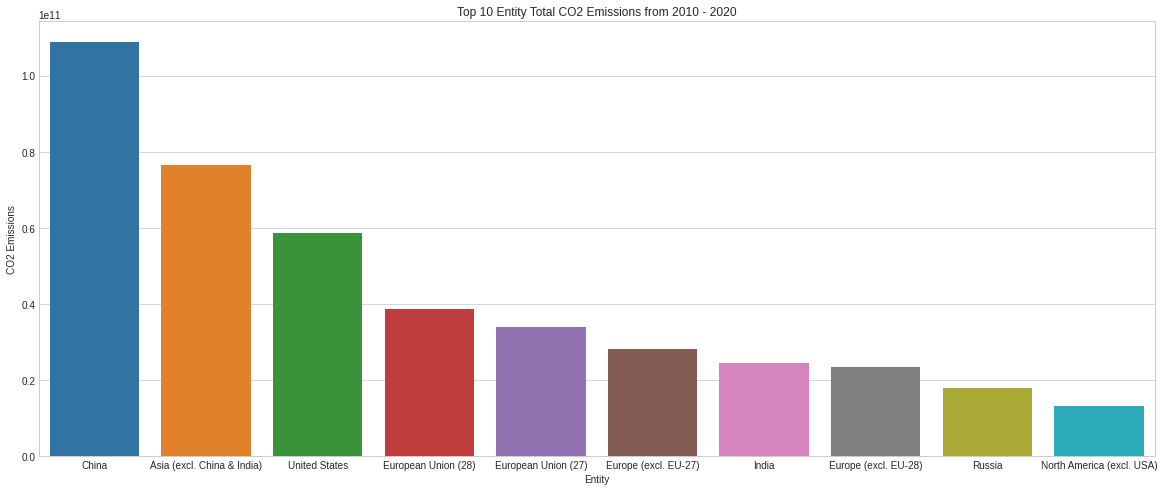

In [17]:
# Scrape the top 10 entities
df_allnew3 = df_allnew2.head(10)

# Make 'df_allnew3' dataset visualization by histogram
plt.figure(figsize=(20,8))
sns.barplot(x = df_allnew3["Entity"], y = df_allnew3['CO2'])
plt.title("Top 10 Entity Total CO2 Emissions from 2010 - 2020")
plt.ylabel('CO2 Emissions')
plt.xlabel('Entity')

In [18]:
# As we can see from the above histogram, the Top 4 CO2 emissions from 2010 to 2020
# countries is 'China','United States','India','Russia'
# I want to analyze the Top 4 countries' data and compare them
Top4countries = df_allnew.loc[df_allnew['Entity'].isin(['China','United States','India','Russia'])]
Top4countries.head(11)

,Entity,Code,Year,CO2,Consumption-based CO2,GDP-PPP
1386,China,CHN,2010,8.616653e+09,7.297770e+09,1.188496e+13
1387,China,CHN,2011,9.528556e+09,8.063335e+09,1.302007e+13
1388,China,CHN,2012,9.775622e+09,8.367184e+09,1.404393e+13
1389,China,CHN,2013,9.952744e+09,8.599146e+09,1.513461e+13
1390,China,CHN,2014,9.985583e+09,8.697497e+09,1.625847e+13
1391,China,CHN,2015,9.848420e+09,8.680580e+09,1.740328e+13
1392,China,CHN,2016,9.720444e+09,8.700417e+09,1.859519e+13
1393,China,CHN,2017,9.920459e+09,8.888677e+09,1.988703e+13
1394,China,CHN,2018,1.028999e+10,9.285067e+09,2.122936e+13
1395,China,CHN,2019,1.048999e+10,9.442835e+09,2.249245e+13


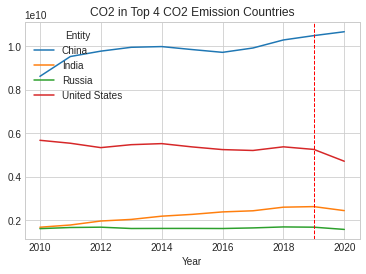

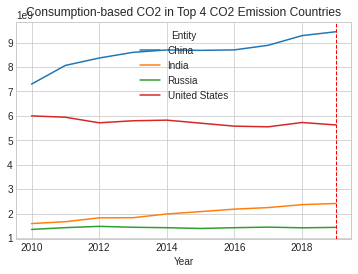

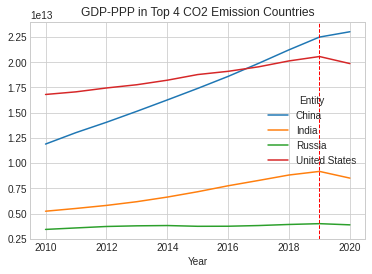

In [19]:
# In 2019, COVID-19 break out. It is a milestone for every country. 
# I want to use 2019 as the dividing line to analyze how the Top 4 countries changed in 'CO2','Consumption-based CO2','GDP-PPP'
for i in ('CO2','Consumption-based CO2','GDP-PPP'):   
    Top4countries_pivot_l = Top4countries.pivot_table(values = i, columns = 'Entity', index = 'Year')
    Top4countries_pivot_l.plot(title = i + ' in Top 4 CO2 Emission Countries')
    plt.axvline(2019, color='r', linestyle='--', linewidth=1)

plt.show()

In [20]:
# As the line chart show
# 1. Only China's CO2 emissions increased faintly from 2019 to 2020, the India, Russia and United State's CO2 emissions all decrease.
# 2. Only China's GDP-PPP increased faintly from 2019 to 2020, the India, Russia and United State's GDP-PPP all decrease.
#    And China's GDP-PPP from 2010 to 2020 raised so much, 
#    that proved that in the past decade, China has experienced rapid development and the people's living standards have greatly improved.

# GDP-PPP: GDP per capita based on purchasing power parity (PPP). GDP (PPP) means gross domestic product based on purchasing power parity. 
# As a conclusion, COVID-19's outbreak had a huge influence on Top 4 countries' CO2 emissions and GDP-PPP except China. 

<function matplotlib.pyplot.show(*args, **kw)>

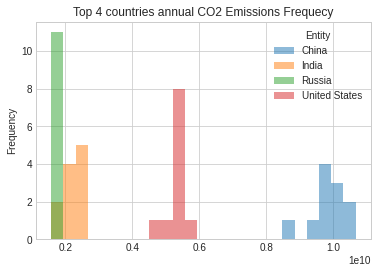

In [21]:
Top4countries_pivot = Top4countries.pivot_table(values = 'CO2',columns='Entity',index='Year')
Top4countries_pivot.plot(kind='hist', alpha=0.5, bins = 25, title = 'Top 4 countries annual CO2 Emissions Frequecy chart').get_figure()
plt.show
# The below frequecy chart shows the distribution of CO2 emissions in Top 4 countries from 2010 to 2020.
# We can see there is almost no change in Russia. India and United State's CO2 emissions fluctuations are minimal. 
# And China has the biggest fluctuation.


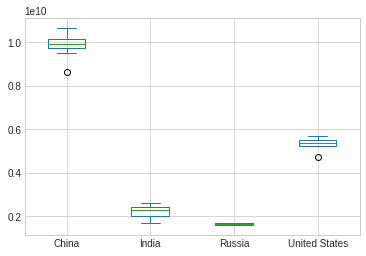

In [22]:
Top4countries_pivot = Top4countries.pivot_table(values = 'CO2',columns='Entity',index='Year')
Top4countries_pivot.plot(kind='box', title = 'Top 4 countries annual CO2 Emissions boxplot')
plt.show()
# The below boxplot shows the every Top 4 countries's CO2 emissions in the past decade do not hava a huge distance especially Russian.

<function matplotlib.pyplot.show(*args, **kw)>

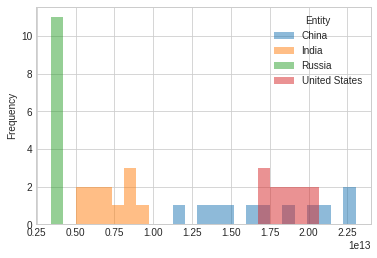

In [23]:
Top4countries_pivot = Top4countries.pivot_table(values = 'GDP-PPP',columns='Entity',index='Year')
Top4countries_pivot.plot(kind='hist', alpha=0.5, bins = 25, title = 'Top 4 GDP-PPP Frequecy chart').get_figure()
plt.show
# The below frequecy chart shows the distribution of GDP-PPP in Top 4 countries from 2010 to 2020.
# We can see there is almost no change in Russia. India and United State's GDP-PPP fluctuations are minimal. 
# And China's GDP-PPP from 2010 to 2020 has a large float. The distribution of the data is discrete.


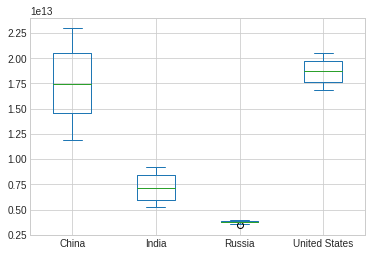

In [24]:
Top4countries_pivot = Top4countries.pivot_table(values = 'GDP-PPP',columns='Entity',index='Year')
Top4countries_pivot.plot(kind='box', title = 'Top 4 GDP-PPP boxplot')
plt.show()
# The below boxplot shows the every Top 4 countries's GDP-PPP in the past decade.
# The distance between the highest GDP-PPP and the lowest GDP-PPP in China is huge which means the Chinese' purchasing power parity increased significantly.